In [1]:
#Importing the Absenteeism_at_work Data Set
import pandas as pd
import os
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
import numpy as np

# import the csv file
input_file = "C:\Kinjal\HU Application\Acceptance\Sem 6\ANLY 530-90- O-2020 Late Spring - Machine Learning I\Project submission\Absenteeism_at_work_train.csv"
absentism_data_set = pd.read_csv(input_file)

print(absentism_data_set.shape)
absentism_data_set.info()
print()
print("It appears that there are 666 observations of 21 variables. Two variables (Weight and Hit Target) have less than 666 records, indicating the presence of missing values.") 

(666, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 21 columns):
ID                                 666 non-null int64
Reason for absence                 666 non-null int64
Month of absence                   666 non-null int64
Day of the week                    666 non-null int64
Seasons                            666 non-null int64
Transportation expense             666 non-null int64
Distance from Residence to Work    666 non-null int64
Service time                       666 non-null int64
Age                                666 non-null object
Work load Average/day              666 non-null object
Hit target                         665 non-null float64
Disciplinary failure               666 non-null int64
Education                          666 non-null int64
Son                                666 non-null int64
Social drinker                     666 non-null int64
Social smoker                      666 non-null int64
Pet              

In [2]:
# Resolving conflicts with Age
absentism_data_set['Age']  = pd.to_numeric(absentism_data_set['Age'] , errors='coerce')
absentism_data_set['Age'] = absentism_data_set['Age'].replace(np.nan, 0, regex=True)
absentism_data_set['Age'] = absentism_data_set['Age'].astype('int64')
absentism_data_set['Age'].replace(0, np.nan, inplace=True)

In [3]:
# Pre-processing 
# Dropping Duplicates if any to keep only unique values
absentism_data_set = absentism_data_set.drop_duplicates(keep='first')
print(absentism_data_set.shape)
print()
print("There were 27 duplicates in the dataset that have been removed")

(639, 21)

There were 27 duplicates in the dataset that have been removed


In [4]:
absentism_data_set.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,639.000000,639.000000,639.000000,639.000000,639.00000,639.000000,639.000000,639.000000,637.000000,638.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,637.000000,639.000000,639.000000,639.000000
mean,17.826291,19.198748,6.514867,3.881064,2.56025,224.413146,30.079812,12.635368,36.406593,94.365204,0.056338,1.253521,1.065728,0.580595,0.071987,0.707355,79.062794,171.940532,26.738654,6.934272
std,10.956720,8.402657,3.536112,1.430172,1.14157,67.011052,14.751491,4.334024,6.443232,3.854070,0.230754,0.624637,1.131786,0.493848,0.258670,1.182603,12.675776,6.038765,4.231424,12.897914
min,1.000000,0.000000,1.000000,2.000000,1.00000,0.000000,5.000000,1.000000,27.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.00000,179.000000,17.000000,9.000000,31.000000,92.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,7.000000,4.000000,2.00000,225.000000,26.000000,13.000000,37.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,10.000000,5.000000,4.00000,260.000000,50.000000,16.000000,40.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.00000,388.000000,52.000000,29.000000,58.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [5]:
print("Noticed variable Reason for absence has minimum value of 0, when the minimim value should be 1 to represent Certain infectious and parasitic diseases") 
for i in range(absentism_data_set.shape[0]): 
    if absentism_data_set["Reason for absence"].iloc[i] == 0.0:
        absentism_data_set["Reason for absence"].iloc[i] = np.nan
        
absentism_data_set["Reason for absence"].describe()

Noticed variable Reason for absence has minimum value of 0, when the minimim value should be 1 to represent Certain infectious and parasitic diseases


count    603.000000
mean      20.344942
std        7.174180
min        1.000000
25%       14.000000
50%       23.000000
75%       26.000000
max       28.000000
Name: Reason for absence, dtype: float64

In [6]:
# Missing Values
print("Missing values: Before")
absentism_data_set.isnull().sum() 

Missing values: Before


ID                                  0
Reason for absence                 36
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 2
Work load Average/day               0
Hit target                          1
Disciplinary failure                0
Education                           0
Son                                 0
Social drinker                      0
Social smoker                       0
Pet                                 0
Weight                              2
Height                              0
Body mass index                     0
Absenteeism time in hours           0
dtype: int64

In [7]:
#To drop unnessary Columns
to_drop = ['ID','Work load Average/day']
absentism_data_set.drop(to_drop, inplace=True, axis=1)

In [8]:
# Resolving missing values with mean substitution 
absentism_data_set["Reason for absence"] = absentism_data_set["Reason for absence"].fillna(absentism_data_set["Reason for absence"].mode().iloc[0])
absentism_data_set["Age"].fillna(absentism_data_set["Age"].mean(), inplace=True)
absentism_data_set["Hit target"].fillna(absentism_data_set["Hit target"].mean(), inplace=True)
absentism_data_set["Weight"].fillna(absentism_data_set["Weight"].mean(), inplace=True)

In [9]:
absentism_data_set.dtypes

Reason for absence                 float64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                float64
Hit target                         float64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                             float64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [10]:
# Missing Values
print("Missing values: After")

absentism_data_set.isnull().sum() 

Missing values: After


Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

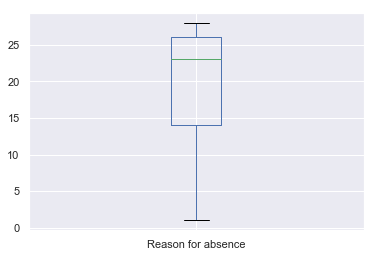

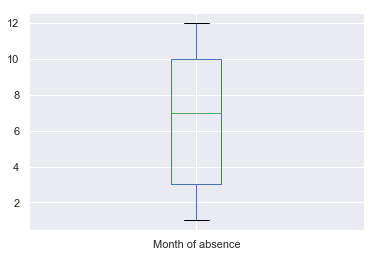

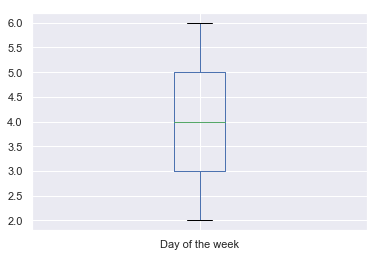

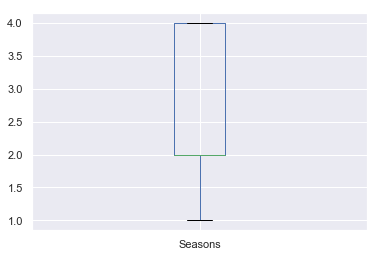

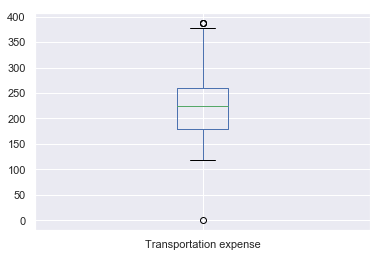

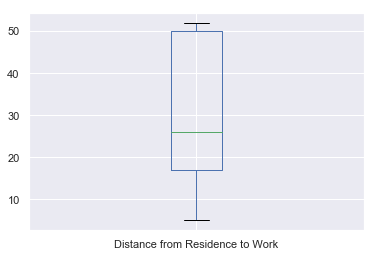

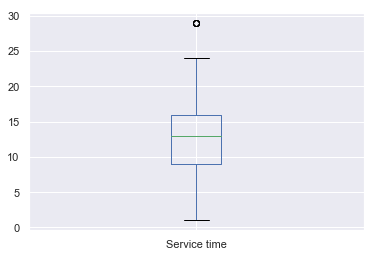

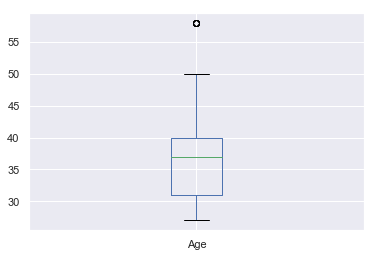

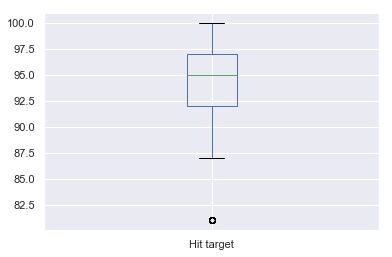

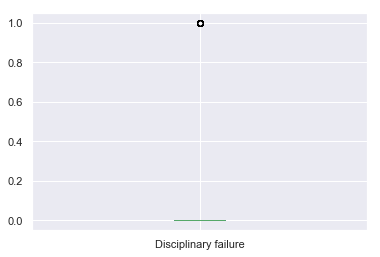

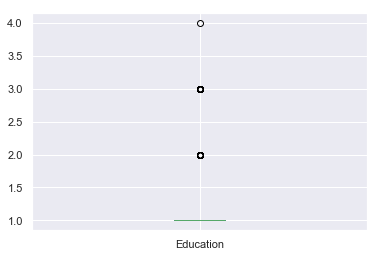

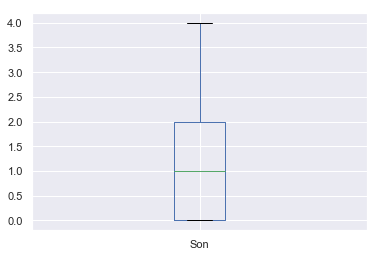

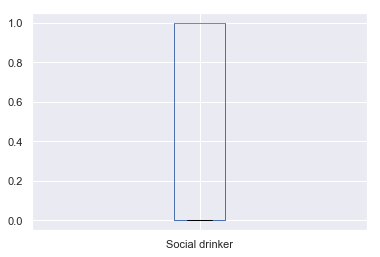

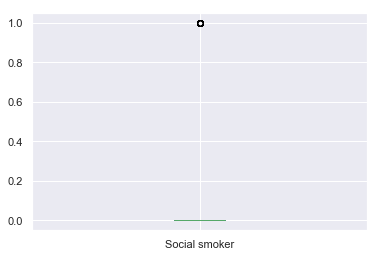

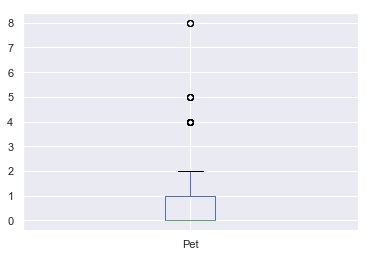

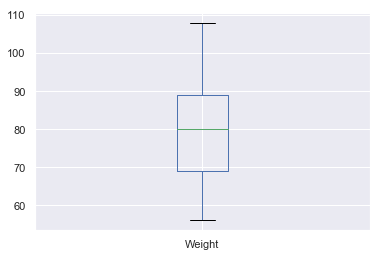

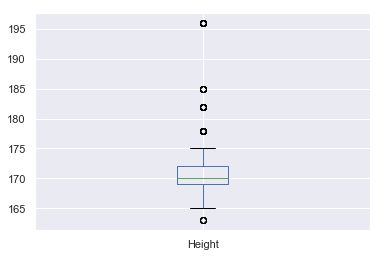

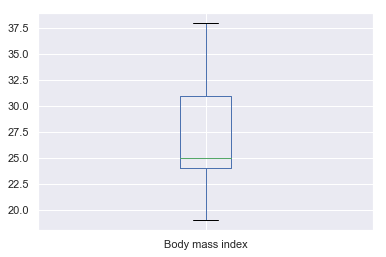

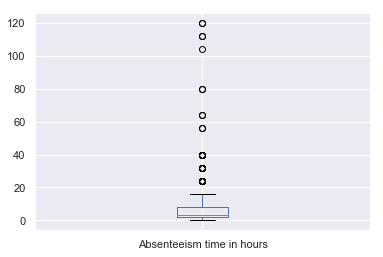

In [13]:
for i in absentism_data_set.columns:
    absentism_data_set.boxplot(column=i)
    plt.show()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
Reason for absence,1.000000,-0.028240,0.121660,-0.041027,-0.072907,0.133244,0.062202,0.012327,0.007100,0.087577,-0.129169,0.033303,0.119560,-0.046555,-0.013740,0.079837,-0.088162,0.118002,-0.305875
Month of absence,-0.028240,1.000000,0.013987,0.427765,0.105292,-0.002472,-0.053083,0.012250,-0.467154,0.112305,-0.058479,0.056544,0.059224,-0.045725,0.051454,0.050477,-0.063377,0.070288,0.010228
Day of the week,0.121660,0.013987,1.000000,0.035117,0.050690,0.096067,0.026119,0.017190,0.008649,0.010837,0.019769,0.127816,0.040224,-0.002241,-0.045633,-0.119506,-0.102815,-0.085176,-0.124567
Seasons,-0.041027,0.427765,0.035117,1.000000,0.035674,-0.058878,-0.011551,-0.003021,-0.087711,0.153698,-0.032445,0.041816,-0.041295,-0.078407,0.049653,-0.027724,-0.057913,0.000831,0.016770
Transportation expense,-0.072907,0.105292,0.050690,0.035674,1.000000,0.235130,-0.360342,-0.218637,-0.074124,0.101174,-0.059536,0.370875,0.132414,0.022967,0.429298,-0.217383,-0.214425,-0.131880,-0.008392
Distance from Residence to Work,0.133244,-0.002472,0.096067,-0.058878,0.235130,1.000000,0.153020,-0.134850,-0.009935,-0.064406,-0.275047,0.065121,0.456426,-0.095574,0.176902,-0.043122,-0.358450,0.128976,-0.079313
Service time,0.062202,-0.053083,0.026119,-0.011551,-0.360342,0.153020,1.000000,0.671901,-0.012149,-0.002936,-0.195653,-0.078826,0.344389,0.050015,-0.428188,0.441761,-0.055508,0.501448,0.007982
Age,0.012327,0.012250,0.017190,-0.003021,-0.218637,-0.134850,0.671901,1.000000,-0.049423,0.098578,-0.209800,0.036150,0.199594,0.109925,-0.253441,0.401808,-0.080070,0.472045,0.035360
Hit target,0.007100,-0.467154,0.008649,-0.087711,-0.074124,-0.009935,-0.012149,-0.049423,1.000000,-0.171349,0.068962,-0.001920,-0.114137,0.033358,0.004356,-0.067362,0.070754,-0.096100,0.039630
Disciplinary failure,0.087577,0.112305,0.010837,0.153698,0.101174,-0.064406,-0.002936,0.098578,-0.171349,1.000000,-0.055750,0.069821,0.070127,0.089504,-0.002670,0.075536,-0.009965,0.082524,-0.131466


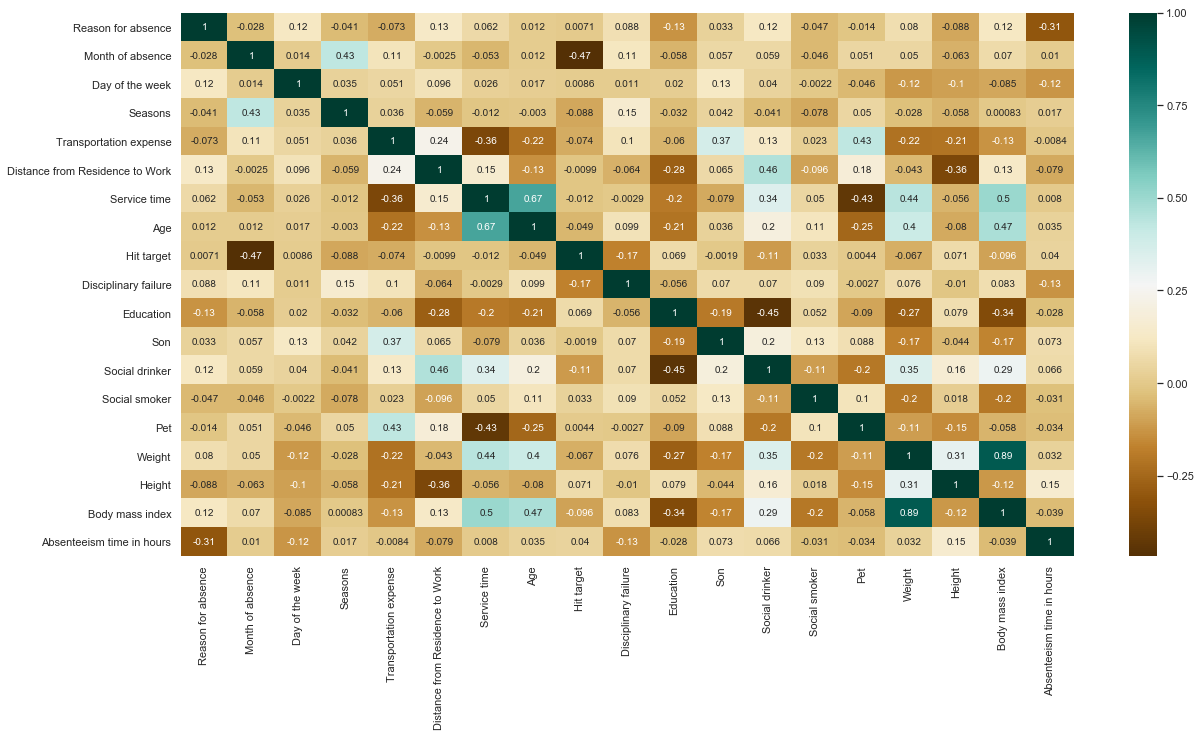

In [14]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
correlation_set= absentism_data_set.corr()
sns.heatmap(correlation_set,cmap="BrBG",annot=True)
correlation_set